In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [3]:
#loading the data
data = pd.read_csv(r'C:\Users\dhruv\Desktop\DataSet HighRadius\H2HBABBA3076.csv')
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200772670,ASSOCIAT trust,06-05-2019 00:00,2019,1929172144,18-04-2019,20190418,20190418,20190503,USD,RV,1,NaN,2460.06,20190418,NAU5,1.929172e+09,0
1,U001,200726979,BJ'S co,19-02-2019 00:00,2019,1928725064,03-02-2019,20190202,20190203,20190218,USD,RV,1,NaN,665.51,20190203,NAA8,1.928725e+09,0
2,U001,200706844,WINC,21-02-2020 00:00,2020,1930488176,06-02-2020,20200206,20200206,20200221,USD,RV,1,NaN,48943.27,20200206,NAA8,1.930488e+09,0
3,U001,200769623,WAL-MAR corporation,23-01-2019 00:00,2019,1928606586,12-01-2019,20190110,20190112,20190127,USD,RV,1,NaN,65944.74,20190112,NAH4,1.928607e+09,0
4,U001,200793830,M corp,03-02-2020 00:00,2020,1930420714,20-01-2020,20200121,20200120,20200204,USD,RV,1,NaN,15579.75,20200120,NAA8,1.930421e+09,0


In [4]:
data.shape

(50000, 19)

In [5]:
[col for col in data.columns if data[col].isnull().sum()>0]

['clear_date', 'area_business', 'invoice_id']

In [6]:
data = data.drop(columns=['area_business'])

In [7]:
data.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [8]:
data[data['invoice_id'].isnull()]
data.shape

(50000, 18)

In [9]:
#date_Time_format
import datetime

data['clear_date'] = pd.to_datetime(data['clear_date'])

In [10]:
data['clear_date'].isnull().sum()

10000

In [11]:
data['posting_date'] = pd.to_datetime(data['posting_date'])

In [12]:
data['due_in_date'] = data['due_in_date'].astype(int)
data['due_in_date'] = data['due_in_date'].astype(str)
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200772670,ASSOCIAT trust,2019-06-05,2019,1929172144,2019-04-18,20190418,20190418,20190503,USD,RV,1,2460.06,20190418,NAU5,1.929172e+09,0
1,U001,200726979,BJ'S co,2019-02-19,2019,1928725064,2019-03-02,20190202,20190203,20190218,USD,RV,1,665.51,20190203,NAA8,1.928725e+09,0
2,U001,200706844,WINC,2020-02-21,2020,1930488176,2020-06-02,20200206,20200206,20200221,USD,RV,1,48943.27,20200206,NAA8,1.930488e+09,0
3,U001,200769623,WAL-MAR corporation,2019-01-23,2019,1928606586,2019-12-01,20190110,20190112,20190127,USD,RV,1,65944.74,20190112,NAH4,1.928607e+09,0
4,U001,200793830,M corp,2020-03-02,2020,1930420714,2020-01-20,20200121,20200120,20200204,USD,RV,1,15579.75,20200120,NAA8,1.930421e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200769556,SHAM associates,NaT,2020,1930660652,2020-03-18,20200317,20200318,20200402,USD,RV,1,39733.95,20200318,NAA8,1.930661e+09,1
49996,U001,200974851,RESTA foundation,2019-02-27,2019,1928786820,2019-12-02,20190212,20190212,20190227,USD,RV,1,7821.59,20190212,NAA8,1.928787e+09,0
49997,U001,200759878,SA associates,2019-09-07,2019,1929531321,2019-06-22,20190622,20190622,20190707,USD,RV,1,38750.48,20190622,NAH4,1.929531e+09,0
49998,U001,200357714,US trust,2019-01-07,2019,1929485899,2019-06-13,20190613,20190613,20190628,USD,RV,1,22407.33,20190613,NAA8,1.929486e+09,0


In [13]:
data['due_in_date'] = pd.to_datetime(data['due_in_date'],format='%Y-%m-%d')
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200772670,ASSOCIAT trust,2019-06-05,2019,1929172144,2019-04-18,20190418,20190418,2019-05-03,USD,RV,1,2460.06,20190418,NAU5,1.929172e+09,0
1,U001,200726979,BJ'S co,2019-02-19,2019,1928725064,2019-03-02,20190202,20190203,2019-02-18,USD,RV,1,665.51,20190203,NAA8,1.928725e+09,0
2,U001,200706844,WINC,2020-02-21,2020,1930488176,2020-06-02,20200206,20200206,2020-02-21,USD,RV,1,48943.27,20200206,NAA8,1.930488e+09,0
3,U001,200769623,WAL-MAR corporation,2019-01-23,2019,1928606586,2019-12-01,20190110,20190112,2019-01-27,USD,RV,1,65944.74,20190112,NAH4,1.928607e+09,0
4,U001,200793830,M corp,2020-03-02,2020,1930420714,2020-01-20,20200121,20200120,2020-02-04,USD,RV,1,15579.75,20200120,NAA8,1.930421e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200769556,SHAM associates,NaT,2020,1930660652,2020-03-18,20200317,20200318,2020-04-02,USD,RV,1,39733.95,20200318,NAA8,1.930661e+09,1
49996,U001,200974851,RESTA foundation,2019-02-27,2019,1928786820,2019-12-02,20190212,20190212,2019-02-27,USD,RV,1,7821.59,20190212,NAA8,1.928787e+09,0
49997,U001,200759878,SA associates,2019-09-07,2019,1929531321,2019-06-22,20190622,20190622,2019-07-07,USD,RV,1,38750.48,20190622,NAH4,1.929531e+09,0
49998,U001,200357714,US trust,2019-01-07,2019,1929485899,2019-06-13,20190613,20190613,2019-06-28,USD,RV,1,22407.33,20190613,NAA8,1.929486e+09,0


In [14]:
data['document_create_date.1'] = data['document_create_date.1'].astype(int)
data['document_create_date.1'] = data['document_create_date.1'].astype(str)

In [15]:
data['document_create_date.1'] = pd.to_datetime(data['document_create_date.1'],format='%Y-%m-%d')
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200772670,ASSOCIAT trust,2019-06-05,2019,1929172144,2019-04-18,20190418,2019-04-18,2019-05-03,USD,RV,1,2460.06,20190418,NAU5,1.929172e+09,0
1,U001,200726979,BJ'S co,2019-02-19,2019,1928725064,2019-03-02,20190202,2019-02-03,2019-02-18,USD,RV,1,665.51,20190203,NAA8,1.928725e+09,0
2,U001,200706844,WINC,2020-02-21,2020,1930488176,2020-06-02,20200206,2020-02-06,2020-02-21,USD,RV,1,48943.27,20200206,NAA8,1.930488e+09,0
3,U001,200769623,WAL-MAR corporation,2019-01-23,2019,1928606586,2019-12-01,20190110,2019-01-12,2019-01-27,USD,RV,1,65944.74,20190112,NAH4,1.928607e+09,0
4,U001,200793830,M corp,2020-03-02,2020,1930420714,2020-01-20,20200121,2020-01-20,2020-02-04,USD,RV,1,15579.75,20200120,NAA8,1.930421e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200769556,SHAM associates,NaT,2020,1930660652,2020-03-18,20200317,2020-03-18,2020-04-02,USD,RV,1,39733.95,20200318,NAA8,1.930661e+09,1
49996,U001,200974851,RESTA foundation,2019-02-27,2019,1928786820,2019-12-02,20190212,2019-02-12,2019-02-27,USD,RV,1,7821.59,20190212,NAA8,1.928787e+09,0
49997,U001,200759878,SA associates,2019-09-07,2019,1929531321,2019-06-22,20190622,2019-06-22,2019-07-07,USD,RV,1,38750.48,20190622,NAH4,1.929531e+09,0
49998,U001,200357714,US trust,2019-01-07,2019,1929485899,2019-06-13,20190613,2019-06-13,2019-06-28,USD,RV,1,22407.33,20190613,NAA8,1.929486e+09,0


In [16]:
data['document_create_date'] = data['document_create_date'].astype(int)
data['document_create_date'] = data['document_create_date'].astype(str)
data['document_create_date'] = pd.to_datetime(data['document_create_date'],format='%Y-%m-%d')
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200772670,ASSOCIAT trust,2019-06-05,2019,1929172144,2019-04-18,2019-04-18,2019-04-18,2019-05-03,USD,RV,1,2460.06,20190418,NAU5,1.929172e+09,0
1,U001,200726979,BJ'S co,2019-02-19,2019,1928725064,2019-03-02,2019-02-02,2019-02-03,2019-02-18,USD,RV,1,665.51,20190203,NAA8,1.928725e+09,0
2,U001,200706844,WINC,2020-02-21,2020,1930488176,2020-06-02,2020-02-06,2020-02-06,2020-02-21,USD,RV,1,48943.27,20200206,NAA8,1.930488e+09,0
3,U001,200769623,WAL-MAR corporation,2019-01-23,2019,1928606586,2019-12-01,2019-01-10,2019-01-12,2019-01-27,USD,RV,1,65944.74,20190112,NAH4,1.928607e+09,0
4,U001,200793830,M corp,2020-03-02,2020,1930420714,2020-01-20,2020-01-21,2020-01-20,2020-02-04,USD,RV,1,15579.75,20200120,NAA8,1.930421e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200769556,SHAM associates,NaT,2020,1930660652,2020-03-18,2020-03-17,2020-03-18,2020-04-02,USD,RV,1,39733.95,20200318,NAA8,1.930661e+09,1
49996,U001,200974851,RESTA foundation,2019-02-27,2019,1928786820,2019-12-02,2019-02-12,2019-02-12,2019-02-27,USD,RV,1,7821.59,20190212,NAA8,1.928787e+09,0
49997,U001,200759878,SA associates,2019-09-07,2019,1929531321,2019-06-22,2019-06-22,2019-06-22,2019-07-07,USD,RV,1,38750.48,20190622,NAH4,1.929531e+09,0
49998,U001,200357714,US trust,2019-01-07,2019,1929485899,2019-06-13,2019-06-13,2019-06-13,2019-06-28,USD,RV,1,22407.33,20190613,NAA8,1.929486e+09,0


In [17]:
data['baseline_create_date'] = data['baseline_create_date'].astype(int)
data['baseline_create_date'] = data['baseline_create_date'].astype(str)
data['baseline_create_date'] = pd.to_datetime(data['baseline_create_date'],format='%Y-%m-%d')
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200772670,ASSOCIAT trust,2019-06-05,2019,1929172144,2019-04-18,2019-04-18,2019-04-18,2019-05-03,USD,RV,1,2460.06,2019-04-18,NAU5,1.929172e+09,0
1,U001,200726979,BJ'S co,2019-02-19,2019,1928725064,2019-03-02,2019-02-02,2019-02-03,2019-02-18,USD,RV,1,665.51,2019-02-03,NAA8,1.928725e+09,0
2,U001,200706844,WINC,2020-02-21,2020,1930488176,2020-06-02,2020-02-06,2020-02-06,2020-02-21,USD,RV,1,48943.27,2020-02-06,NAA8,1.930488e+09,0
3,U001,200769623,WAL-MAR corporation,2019-01-23,2019,1928606586,2019-12-01,2019-01-10,2019-01-12,2019-01-27,USD,RV,1,65944.74,2019-01-12,NAH4,1.928607e+09,0
4,U001,200793830,M corp,2020-03-02,2020,1930420714,2020-01-20,2020-01-21,2020-01-20,2020-02-04,USD,RV,1,15579.75,2020-01-20,NAA8,1.930421e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200769556,SHAM associates,NaT,2020,1930660652,2020-03-18,2020-03-17,2020-03-18,2020-04-02,USD,RV,1,39733.95,2020-03-18,NAA8,1.930661e+09,1
49996,U001,200974851,RESTA foundation,2019-02-27,2019,1928786820,2019-12-02,2019-02-12,2019-02-12,2019-02-27,USD,RV,1,7821.59,2019-02-12,NAA8,1.928787e+09,0
49997,U001,200759878,SA associates,2019-09-07,2019,1929531321,2019-06-22,2019-06-22,2019-06-22,2019-07-07,USD,RV,1,38750.48,2019-06-22,NAH4,1.929531e+09,0
49998,U001,200357714,US trust,2019-01-07,2019,1929485899,2019-06-13,2019-06-13,2019-06-13,2019-06-28,USD,RV,1,22407.33,2019-06-13,NAA8,1.929486e+09,0


In [18]:
sameval = data[data['baseline_create_date']==data['document_create_date.1']]
acc = sameval.count()/data.count()
acc

business_code             0.890860
cust_number               0.890860
name_customer             0.890860
clear_date                0.889375
buisness_year             0.890860
doc_id                    0.890860
posting_date              0.890860
document_create_date      0.890860
document_create_date.1    0.890860
due_in_date               0.890860
invoice_currency          0.890860
document type             0.890860
posting_id                0.890860
total_open_amount         0.890860
baseline_create_date      0.890860
cust_payment_terms        0.890860
invoice_id                0.890851
isOpen                    0.890860
dtype: float64

In [19]:
data = data.drop(['document_create_date.1'],axis=1)
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200772670,ASSOCIAT trust,2019-06-05,2019,1929172144,2019-04-18,2019-04-18,2019-05-03,USD,RV,1,2460.06,2019-04-18,NAU5,1.929172e+09,0
1,U001,200726979,BJ'S co,2019-02-19,2019,1928725064,2019-03-02,2019-02-02,2019-02-18,USD,RV,1,665.51,2019-02-03,NAA8,1.928725e+09,0
2,U001,200706844,WINC,2020-02-21,2020,1930488176,2020-06-02,2020-02-06,2020-02-21,USD,RV,1,48943.27,2020-02-06,NAA8,1.930488e+09,0
3,U001,200769623,WAL-MAR corporation,2019-01-23,2019,1928606586,2019-12-01,2019-01-10,2019-01-27,USD,RV,1,65944.74,2019-01-12,NAH4,1.928607e+09,0
4,U001,200793830,M corp,2020-03-02,2020,1930420714,2020-01-20,2020-01-21,2020-02-04,USD,RV,1,15579.75,2020-01-20,NAA8,1.930421e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200769556,SHAM associates,NaT,2020,1930660652,2020-03-18,2020-03-17,2020-04-02,USD,RV,1,39733.95,2020-03-18,NAA8,1.930661e+09,1
49996,U001,200974851,RESTA foundation,2019-02-27,2019,1928786820,2019-12-02,2019-02-12,2019-02-27,USD,RV,1,7821.59,2019-02-12,NAA8,1.928787e+09,0
49997,U001,200759878,SA associates,2019-09-07,2019,1929531321,2019-06-22,2019-06-22,2019-07-07,USD,RV,1,38750.48,2019-06-22,NAH4,1.929531e+09,0
49998,U001,200357714,US trust,2019-01-07,2019,1929485899,2019-06-13,2019-06-13,2019-06-28,USD,RV,1,22407.33,2019-06-13,NAA8,1.929486e+09,0


In [20]:
data=data.drop(['posting_id'],axis=1)
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200772670,ASSOCIAT trust,2019-06-05,2019,1929172144,2019-04-18,2019-04-18,2019-05-03,USD,RV,2460.06,2019-04-18,NAU5,1.929172e+09,0
1,U001,200726979,BJ'S co,2019-02-19,2019,1928725064,2019-03-02,2019-02-02,2019-02-18,USD,RV,665.51,2019-02-03,NAA8,1.928725e+09,0
2,U001,200706844,WINC,2020-02-21,2020,1930488176,2020-06-02,2020-02-06,2020-02-21,USD,RV,48943.27,2020-02-06,NAA8,1.930488e+09,0
3,U001,200769623,WAL-MAR corporation,2019-01-23,2019,1928606586,2019-12-01,2019-01-10,2019-01-27,USD,RV,65944.74,2019-01-12,NAH4,1.928607e+09,0
4,U001,200793830,M corp,2020-03-02,2020,1930420714,2020-01-20,2020-01-21,2020-02-04,USD,RV,15579.75,2020-01-20,NAA8,1.930421e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200769556,SHAM associates,NaT,2020,1930660652,2020-03-18,2020-03-17,2020-04-02,USD,RV,39733.95,2020-03-18,NAA8,1.930661e+09,1
49996,U001,200974851,RESTA foundation,2019-02-27,2019,1928786820,2019-12-02,2019-02-12,2019-02-27,USD,RV,7821.59,2019-02-12,NAA8,1.928787e+09,0
49997,U001,200759878,SA associates,2019-09-07,2019,1929531321,2019-06-22,2019-06-22,2019-07-07,USD,RV,38750.48,2019-06-22,NAH4,1.929531e+09,0
49998,U001,200357714,US trust,2019-01-07,2019,1929485899,2019-06-13,2019-06-13,2019-06-28,USD,RV,22407.33,2019-06-13,NAA8,1.929486e+09,0


In [21]:
data.shape

(50000, 16)

In [22]:
data[data['isOpen']==1]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
5,U001,200744019,TARG us,NaT,2020,1930826764,2020-04-26,2020-04-25,2020-05-11,USD,RV,22133.32,2020-04-26,NAA8,1.930827e+09,1
6,U001,200416837,DEC foundation,NaT,2020,1930698491,2020-03-25,2020-03-25,2020-04-08,USD,RV,5801.78,2020-03-16,NAM4,1.930698e+09,1
8,U001,200769623,WAL-MAR co,NaT,2020,1930730740,2020-02-04,2020-04-02,2020-04-17,USD,RV,8727.36,2020-04-02,NAH4,1.930731e+09,1
9,U001,200782669,SYGMA associates,NaT,2020,1930745160,2020-06-04,2020-04-03,2020-04-21,USD,RV,839.31,2020-04-06,NAA8,1.930745e+09,1
16,U001,200726979,BJ'S trust,NaT,2020,1930778645,2020-12-04,2020-04-11,2020-04-27,USD,RV,2102.49,2020-04-12,NAA8,1.930779e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49978,U001,200769623,WAL-MAR corp,NaT,2020,1930699466,2020-03-26,2020-03-25,2020-04-10,USD,RV,661.11,2020-03-26,NAH4,1.930699e+09,1
49979,U001,200769623,WAL-MAR,NaT,2020,1930860950,2020-07-05,2020-05-05,2020-05-22,USD,RV,51927.43,2020-05-07,NAH4,1.930861e+09,1
49985,CA02,140106408,WAL-M us,NaT,2020,2960622702,2020-03-19,2020-03-19,2020-03-29,CAD,RV,60119.42,2020-03-19,CA10,2.960623e+09,1
49988,U001,200762301,C&S WH associates,NaT,2020,1930653444,2020-03-16,2020-03-15,2020-03-31,USD,RV,1076.74,2020-03-16,NAC6,1.930653e+09,1


In [23]:
data[data['invoice_currency']=='USD']

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200772670,ASSOCIAT trust,2019-06-05,2019,1929172144,2019-04-18,2019-04-18,2019-05-03,USD,RV,2460.06,2019-04-18,NAU5,1.929172e+09,0
1,U001,200726979,BJ'S co,2019-02-19,2019,1928725064,2019-03-02,2019-02-02,2019-02-18,USD,RV,665.51,2019-02-03,NAA8,1.928725e+09,0
2,U001,200706844,WINC,2020-02-21,2020,1930488176,2020-06-02,2020-02-06,2020-02-21,USD,RV,48943.27,2020-02-06,NAA8,1.930488e+09,0
3,U001,200769623,WAL-MAR corporation,2019-01-23,2019,1928606586,2019-12-01,2019-01-10,2019-01-27,USD,RV,65944.74,2019-01-12,NAH4,1.928607e+09,0
4,U001,200793830,M corp,2020-03-02,2020,1930420714,2020-01-20,2020-01-21,2020-02-04,USD,RV,15579.75,2020-01-20,NAA8,1.930421e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200769556,SHAM associates,NaT,2020,1930660652,2020-03-18,2020-03-17,2020-04-02,USD,RV,39733.95,2020-03-18,NAA8,1.930661e+09,1
49996,U001,200974851,RESTA foundation,2019-02-27,2019,1928786820,2019-12-02,2019-02-12,2019-02-27,USD,RV,7821.59,2019-02-12,NAA8,1.928787e+09,0
49997,U001,200759878,SA associates,2019-09-07,2019,1929531321,2019-06-22,2019-06-22,2019-07-07,USD,RV,38750.48,2019-06-22,NAH4,1.929531e+09,0
49998,U001,200357714,US trust,2019-01-07,2019,1929485899,2019-06-13,2019-06-13,2019-06-28,USD,RV,22407.33,2019-06-13,NAA8,1.929486e+09,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         50000 non-null  object        
 1   cust_number           50000 non-null  object        
 2   name_customer         50000 non-null  object        
 3   clear_date            40000 non-null  datetime64[ns]
 4   buisness_year         50000 non-null  int64         
 5   doc_id                50000 non-null  int64         
 6   posting_date          50000 non-null  datetime64[ns]
 7   document_create_date  50000 non-null  datetime64[ns]
 8   due_in_date           50000 non-null  datetime64[ns]
 9   invoice_currency      50000 non-null  object        
 10  document type         50000 non-null  object        
 11  total_open_amount     50000 non-null  float64       
 12  baseline_create_date  50000 non-null  datetime64[ns]
 13  cust_payment_ter

In [25]:
diff = abs(data['clear_date']-data['posting_date'])
diff

0        48 days
1        11 days
2       102 days
3       312 days
4        42 days
          ...   
49995        NaT
49996   278 days
49997    77 days
49998   157 days
49999    47 days
Length: 50000, dtype: timedelta64[ns]

In [26]:
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200772670,ASSOCIAT trust,2019-06-05,2019,1929172144,2019-04-18,2019-04-18,2019-05-03,USD,RV,2460.06,2019-04-18,NAU5,1.929172e+09,0
1,U001,200726979,BJ'S co,2019-02-19,2019,1928725064,2019-03-02,2019-02-02,2019-02-18,USD,RV,665.51,2019-02-03,NAA8,1.928725e+09,0
2,U001,200706844,WINC,2020-02-21,2020,1930488176,2020-06-02,2020-02-06,2020-02-21,USD,RV,48943.27,2020-02-06,NAA8,1.930488e+09,0
3,U001,200769623,WAL-MAR corporation,2019-01-23,2019,1928606586,2019-12-01,2019-01-10,2019-01-27,USD,RV,65944.74,2019-01-12,NAH4,1.928607e+09,0
4,U001,200793830,M corp,2020-03-02,2020,1930420714,2020-01-20,2020-01-21,2020-02-04,USD,RV,15579.75,2020-01-20,NAA8,1.930421e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200769556,SHAM associates,NaT,2020,1930660652,2020-03-18,2020-03-17,2020-04-02,USD,RV,39733.95,2020-03-18,NAA8,1.930661e+09,1
49996,U001,200974851,RESTA foundation,2019-02-27,2019,1928786820,2019-12-02,2019-02-12,2019-02-27,USD,RV,7821.59,2019-02-12,NAA8,1.928787e+09,0
49997,U001,200759878,SA associates,2019-09-07,2019,1929531321,2019-06-22,2019-06-22,2019-07-07,USD,RV,38750.48,2019-06-22,NAH4,1.929531e+09,0
49998,U001,200357714,US trust,2019-01-07,2019,1929485899,2019-06-13,2019-06-13,2019-06-28,USD,RV,22407.33,2019-06-13,NAA8,1.929486e+09,0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         50000 non-null  object        
 1   cust_number           50000 non-null  object        
 2   name_customer         50000 non-null  object        
 3   clear_date            40000 non-null  datetime64[ns]
 4   buisness_year         50000 non-null  int64         
 5   doc_id                50000 non-null  int64         
 6   posting_date          50000 non-null  datetime64[ns]
 7   document_create_date  50000 non-null  datetime64[ns]
 8   due_in_date           50000 non-null  datetime64[ns]
 9   invoice_currency      50000 non-null  object        
 10  document type         50000 non-null  object        
 11  total_open_amount     50000 non-null  float64       
 12  baseline_create_date  50000 non-null  datetime64[ns]
 13  cust_payment_ter

In [28]:
#correlation Matrix

corr = data[['doc_id','invoice_id']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(5)

,doc_id,invoice_id
doc_id,1.00000,1.00000
invoice_id,1.00000,1.00000


In [29]:
data[data['invoice_id'].isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
865,CA02,140104409,LOB co,2019-05-31,2019,9500000058,2019-03-29,2019-03-29,2019-03-24,CAD,X2,13595.04,2019-03-14,CA10,NaN,0
19145,CA02,140104225,SAVE-ON- in,2019-02-05,2019,9500000084,2019-03-29,2019-03-29,2019-03-02,CAD,X2,3620.16,2019-02-20,CA10,NaN,0
28895,CA02,140104409,LOB in,2019-12-27,2019,9500000200,2019-04-30,2019-04-30,2019-04-18,CAD,X2,454.44,2019-04-08,CA10,NaN,0
49188,CA02,140104409,LOB co,2019-12-27,2019,9500000073,2019-03-29,2019-03-29,2019-03-10,CAD,X2,173.44,2019-02-28,CA10,NaN,0


<AxesSubplot:title={'center':'doc_id vs invoice_id'}, xlabel='doc_id', ylabel='invoice_id'>

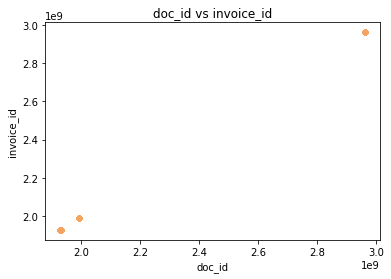

In [30]:
data.plot.scatter(x = 'doc_id', y = 'invoice_id',
                  color = 'sandybrown', title = 'doc_id vs invoice_id')


In [31]:
data['doc_id'].unique()

array([1929172144, 1928725064, 1930488176, ..., 1929531321, 1929485899,
       1929674190], dtype=int64)

In [32]:
data['business_code'].unique()

array(['U001', 'CA02', 'U013', 'U002', 'U005', 'U007'], dtype=object)

In [33]:
data['invoice_currency'].unique()#Categorical data Encoding

array(['USD', 'CAD'], dtype=object)

In [37]:
data['cust_payment_terms'].unique()

array(['NAU5', 'NAA8', 'NAH4', 'NAM4', 'NAX2', 'NAAX', 'CA10', 'NA10',
       'NAD1', 'NAC6', 'NA32', 'NAAW', 'NAG2', 'NAGD', 'NACB', 'NAVE',
       'NA8Q', 'NAUP', 'NAM2', 'NAWU', 'NAVF', 'NAM1', 'NAUZ', 'NAVR',
       'NAVM', 'NA38', 'NAVQ', 'NANC', 'NA84', 'NAD5', 'NAWP', 'NAWM',
       'NA25', 'NAVL', 'NA3F', 'NAWN', 'B112', 'NA3B', 'CA30', 'CAB1',
       'NA9X', 'NAM3', 'NAB1', 'NABG', 'NAD4', 'NATK', 'NAVD', 'NACH',
       'NATM', 'C106', 'BR56', 'NAD8', 'NATU', 'CAX2', 'BR12', 'NATZ',
       'C129', '90M7', 'NATW', 'B052', 'NAUI', 'NAUW', 'NATJ', 'NATX',
       'NATL', 'NA31', 'NAUX', 'NACE', 'NAWR', 'NAV9', 'NAVC', 'NAV2',
       'NACG', 'NAUY', 'NATH'], dtype=object)

In [35]:
len(data['cust_number'].unique())

1057

In [624]:
data[data['cust_number']=='CCU002']

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
124,U001,CCU002,KRFT FDS systems,NaT,2020,1930585437,2020-05-03,2020-03-01,2020-04-09,USD,9120.00,2020-03-05,NAG2,1.930585e+09,1
174,U001,CCU002,KRFT FDS llc,2019-01-11,2019,1929917629,2019-09-26,2019-09-24,2019-10-31,USD,49862.70,2019-09-26,NAG2,1.929918e+09,0
803,U001,CCU002,KRFT FDS associates,NaT,2020,1930567002,2020-02-27,2020-02-25,2020-04-02,USD,6466.88,2020-02-27,NAG2,1.930567e+09,1
810,U001,CCU002,KRFT FDS systems,2019-11-27,2019,1930036090,2019-10-25,2019-10-21,2019-11-29,USD,11820.48,2019-10-25,NAG2,1.930036e+09,0
984,U001,CCU002,KRFT FDS corp,2019-05-31,2019,1929052010,2019-03-31,2019-04-01,2019-05-05,USD,537.60,2019-03-31,NAG2,1.929052e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49022,U001,CCU002,KRFT FDS trust,2019-06-28,2019,1929348447,2019-05-22,2019-05-20,2019-06-26,USD,14845.33,2019-05-22,NAG2,1.929348e+09,0
49038,U001,CCU002,KRFT FDS foundation,NaT,2020,1930599085,2020-08-03,2020-03-04,2020-04-12,USD,56306.22,2020-03-08,NAG2,1.930599e+09,1
49078,U001,CCU002,KRFT FDS co,2019-05-31,2019,1929107133,2019-10-04,2019-04-08,2019-05-15,USD,11562.16,2019-04-10,NAG2,1.929107e+09,0
49193,U001,CCU002,KRFT FDS in,2019-03-05,2019,1928894988,2019-08-03,2019-03-04,2019-04-12,USD,8891.52,2019-03-08,NAG2,1.928895e+09,0


In [625]:
data['cust_payment_terms'].unique()

array(['NAU5', 'NAA8', 'NAH4', 'NAM4', 'NAX2', 'NAAX', 'CA10', 'NA10',
       'NAD1', 'NAC6', 'NA32', 'NAAW', 'NAG2', 'NAGD', 'NACB', 'NAVE',
       'NA8Q', 'NAUP', 'NAM2', 'NAWU', 'NAVF', 'NAM1', 'NAUZ', 'NAVR',
       'NAVM', 'NA38', 'NAVQ', 'NANC', 'NA84', 'NAD5', 'NAWP', 'NAWM',
       'NA25', 'NAVL', 'NA3F', 'NAWN', 'B112', 'NA3B', 'CA30', 'CAB1',
       'NA9X', 'NAM3', 'NAB1', 'NABG', 'NAD4', 'NATK', 'NAVD', 'NACH',
       'NATM', 'C106', 'BR56', 'NAD8', 'NATU', 'CAX2', 'BR12', 'NATZ',
       'C129', '90M7', 'NATW', 'B052', 'NAUI', 'NAUW', 'NATJ', 'NATX',
       'NATL', 'NA31', 'NAUX', 'NACE', 'NAWR', 'NAV9', 'NAVC', 'NAV2',
       'NACG', 'NAUY', 'NATH'], dtype=object)

In [626]:
len(data)-len(data['doc_id'].unique())

1139

In [627]:
#missing Values
data.isnull().sum()

business_code               0
cust_number                 0
name_customer               0
clear_date              10000
buisness_year               0
doc_id                      0
posting_date                0
document_create_date        0
due_in_date                 0
invoice_currency            0
total_open_amount           0
baseline_create_date        0
cust_payment_terms          0
invoice_id                  4
isOpen                      0
dtype: int64

In [628]:
data.sort_values(by='clear_date').reset_index(drop=True)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200759878,SA in,2019-01-02,2019,1928626694,2019-01-16,2019-01-15,2019-01-31,USD,14149.92,2019-01-16,NAH4,1.928627e+09,0
1,U001,200759878,SA associates,2019-01-02,2019,1928621551,2019-01-16,2019-01-14,2019-01-31,USD,20362.25,2019-01-16,NAH4,1.928622e+09,0
2,U001,200759878,SA trust,2019-01-02,2019,1928620808,2019-01-16,2019-01-14,2019-01-31,USD,14257.87,2019-01-16,NAH4,1.928621e+09,0
3,U001,200230690,DECA trust,2019-01-02,2019,1928661034,2019-01-22,2019-01-22,2019-02-08,USD,1244.14,2019-01-16,NAM4,1.928661e+09,0
4,U001,200769623,WAL-MAR corp,2019-01-02,2019,1928628197,2019-01-15,2019-01-15,2019-01-30,USD,34231.85,2019-01-15,NAH4,1.928628e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200769623,WAL-MAR corp,NaT,2020,1930699466,2020-03-26,2020-03-25,2020-04-10,USD,661.11,2020-03-26,NAH4,1.930699e+09,1
49996,U001,200769623,WAL-MAR,NaT,2020,1930860950,2020-07-05,2020-05-05,2020-05-22,USD,51927.43,2020-05-07,NAH4,1.930861e+09,1
49997,CA02,140106408,WAL-M us,NaT,2020,2960622702,2020-03-19,2020-03-19,2020-03-29,CAD,60119.42,2020-03-19,CA10,2.960623e+09,1
49998,U001,200762301,C&S WH associates,NaT,2020,1930653444,2020-03-16,2020-03-15,2020-03-31,USD,1076.74,2020-03-16,NAC6,1.930653e+09,1


In [629]:
data = data.drop(['invoice_id'],axis=1)# dropping corelated column to 'doc_id'

In [630]:
data.isnull().sum()#no null values

business_code               0
cust_number                 0
name_customer               0
clear_date              10000
buisness_year               0
doc_id                      0
posting_date                0
document_create_date        0
due_in_date                 0
invoice_currency            0
total_open_amount           0
baseline_create_date        0
cust_payment_terms          0
isOpen                      0
dtype: int64

In [631]:
data.shape

(50000, 14)

In [632]:
data['Delay'] = data['clear_date']-data['due_in_date']
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,Delay
0,U001,200772670,ASSOCIAT trust,2019-06-05,2019,1929172144,2019-04-18,2019-04-18,2019-05-03,USD,2460.06,2019-04-18,NAU5,0,33 days
1,U001,200726979,BJ'S co,2019-02-19,2019,1928725064,2019-03-02,2019-02-02,2019-02-18,USD,665.51,2019-02-03,NAA8,0,1 days
2,U001,200706844,WINC,2020-02-21,2020,1930488176,2020-06-02,2020-02-06,2020-02-21,USD,48943.27,2020-02-06,NAA8,0,0 days
3,U001,200769623,WAL-MAR corporation,2019-01-23,2019,1928606586,2019-12-01,2019-01-10,2019-01-27,USD,65944.74,2019-01-12,NAH4,0,-4 days
4,U001,200793830,M corp,2020-03-02,2020,1930420714,2020-01-20,2020-01-21,2020-02-04,USD,15579.75,2020-01-20,NAA8,0,27 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200769556,SHAM associates,NaT,2020,1930660652,2020-03-18,2020-03-17,2020-04-02,USD,39733.95,2020-03-18,NAA8,1,NaT
49996,U001,200974851,RESTA foundation,2019-02-27,2019,1928786820,2019-12-02,2019-02-12,2019-02-27,USD,7821.59,2019-02-12,NAA8,0,0 days
49997,U001,200759878,SA associates,2019-09-07,2019,1929531321,2019-06-22,2019-06-22,2019-07-07,USD,38750.48,2019-06-22,NAH4,0,62 days
49998,U001,200357714,US trust,2019-01-07,2019,1929485899,2019-06-13,2019-06-13,2019-06-28,USD,22407.33,2019-06-13,NAA8,0,-172 days


In [633]:
data = data.sort_values(by='clear_date').reset_index(drop=True)
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,Delay
0,U001,200759878,SA in,2019-01-02,2019,1928626694,2019-01-16,2019-01-15,2019-01-31,USD,14149.92,2019-01-16,NAH4,0,-29 days
1,U001,200759878,SA associates,2019-01-02,2019,1928621551,2019-01-16,2019-01-14,2019-01-31,USD,20362.25,2019-01-16,NAH4,0,-29 days
2,U001,200759878,SA trust,2019-01-02,2019,1928620808,2019-01-16,2019-01-14,2019-01-31,USD,14257.87,2019-01-16,NAH4,0,-29 days
3,U001,200230690,DECA trust,2019-01-02,2019,1928661034,2019-01-22,2019-01-22,2019-02-08,USD,1244.14,2019-01-16,NAM4,0,-37 days
4,U001,200769623,WAL-MAR corp,2019-01-02,2019,1928628197,2019-01-15,2019-01-15,2019-01-30,USD,34231.85,2019-01-15,NAH4,0,-28 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200769623,WAL-MAR corp,NaT,2020,1930699466,2020-03-26,2020-03-25,2020-04-10,USD,661.11,2020-03-26,NAH4,1,NaT
49996,U001,200769623,WAL-MAR,NaT,2020,1930860950,2020-07-05,2020-05-05,2020-05-22,USD,51927.43,2020-05-07,NAH4,1,NaT
49997,CA02,140106408,WAL-M us,NaT,2020,2960622702,2020-03-19,2020-03-19,2020-03-29,CAD,60119.42,2020-03-19,CA10,1,NaT
49998,U001,200762301,C&S WH associates,NaT,2020,1930653444,2020-03-16,2020-03-15,2020-03-31,USD,1076.74,2020-03-16,NAC6,1,NaT


In [635]:
#test Data
test = data.loc[40000:]
test.shape

(10000, 15)

In [636]:
#main Data set
data = data.loc[:39999]
data.shape

(40000, 15)

In [638]:
data.isnull().sum()

business_code           0
cust_number             0
name_customer           0
clear_date              0
buisness_year           0
doc_id                  0
posting_date            0
document_create_date    0
due_in_date             0
invoice_currency        0
total_open_amount       0
baseline_create_date    0
cust_payment_terms      0
isOpen                  0
Delay                   0
dtype: int64

In [643]:
# separate train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    data.drop(labels=['Delay'], axis=1),
    data['Delay'],
    test_size=0.2,
    random_state=0)

x_train.shape, x_test.shape,y_train.shape,y_test.shape

((32000, 14), (8000, 14), (32000,), (8000,))

In [1]:
#checking Duplicate values
x_train.duplicated().sum()

NameError: name 'x_train' is not defined